In [ ]:
#Import The Solar Flare Data Set Files
#change it according to your files location
labelFile="Data\\labels_1540_4classes_icmla_21.pck"
inputsFile="Data\\mvts_1540_icmla_21.pck"

In [ ]:
import pickle

import numpy as np



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


import random
import matplotlib.pyplot as plt



import pandas as pd



from sklearn.feature_selection import SelectKBest, SelectPercentile, mutual_info_classif



In [ ]:
def loadInputs(file_name):
        with open(file_name, 'rb') as fp:
            obj = pickle.load(fp)
        return obj

In [ ]:
#device = torch.device('cpu')
#print("Processing in :",device)

Sampled_inputs=loadInputs("mvts_1540_icmla_21.pck")
Sampled_labels=loadInputs("labels_1540_4classes_icmla_21.pck") 
trainData = Sampled_inputs
trainLabel = Sampled_labels
print("trainData.shape: ", trainData.shape)
print("trainLebel.shape: ", trainLabel.shape)
print("Classes/labels : ",np.unique(trainLabel))

trainData.shape:  (1540, 33, 60)
trainLebel.shape:  (1540,)
Classes/labels :  [0 1 2 3]


In [ ]:
#standardization/z normalization of the univaraite time series
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
npArrays=[]
for l in range(0, len(trainData)):
  trainData_std = sc.fit_transform(trainData[l])
  #trainData_std = trainData_std.astype(np.float64)
  #print(type(trainData_std[0][0]))
  npArrays.append(trainData_std)

print(type(npArrays))
arr = np.asarray(npArrays)
print(type(arr))
trainData=arr
print("trainData.shape: ",trainData.shape)
print(type(trainData))
print("trainLebel.shape: ",trainLabel.shape)
print(type(trainLabel))

<class 'list'>
<class 'numpy.ndarray'>
trainData.shape:  (1540, 33, 60)
<class 'numpy.ndarray'>
trainLebel.shape:  (1540,)
<class 'numpy.ndarray'>


In [ ]:
#Transposing trainData to shape:(1540, 60, 33)
trainDatatemp=np.empty([1540,60, 33])
n=len(trainData)
for l in range(0, n):
  temp=trainData[l]
  temp=temp.T
  trainDatatemp[l,:,:]=temp
  

trainData=trainDatatemp
print("Transposing trainData shape: ",trainData.shape)

Transposing trainData shape:  (1540, 60, 33)


In [ ]:
#Taking the first 25 parameters which are based parameters:(1540, 60, 25)
trainDatat1=np.empty([1540,60, 25])
n=len(trainData)
for l in range(0, n):
  temp=trainData[l,:,0:25]
  trainDatat1[l,:,:]=temp
  

trainData=trainDatat1
print("trainData shape: ",trainData.shape)

trainData shape:  (1540, 60, 25)


In [ ]:
# Stratify the data
r=0
validation_size=0.2
mvts_1540=trainData
labels_1540=trainLabel
X_train, X_test, y_train, y_test = train_test_split(mvts_1540, labels_1540, test_size=0.3, random_state=r, stratify=labels_1540)
print("\n\n\n *************** Validation Size is: ", validation_size,"of training size")
print("after train validation split:")
X_train, X_val,y_train, y_val= train_test_split(X_train,y_train, test_size=validation_size,random_state=r,stratify=y_train)
#check percentage of examples
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)
print("X_val shape: ",X_val.shape) 
print("y_val shape ",y_val.shape)
unique_y_train, counts_y_train = np.unique(y_train, return_counts=True)
y_train_stats = dict(zip(unique_y_train, counts_y_train))
print("y_train_counts")
print(y_train_stats)
#270/(269+269+270+270) = 0.25
unique_y_val, counts_y_val = np.unique(y_val, return_counts=True)
y_val_stats = dict(zip(unique_y_val, counts_y_val))
print("y_validation_counts")
print(y_val_stats)
unique_y_test, counts_y_test = np.unique(y_test, return_counts=True)
y_test_stats = dict(zip(unique_y_test, counts_y_test))
print("y_test_counts")
print(y_test_stats)#116/(116+116+115+115) = 0.25




 *************** Validation Size is:  0.2 of training size
after train validation split:
X_train shape:  (862, 60, 25)
y_train shape:  (862,)
X_test shape:  (462, 60, 25)
y_test shape:  (462,)
X_val shape:  (216, 60, 25)
y_val shape  (216,)
y_train_counts
{0: 215, 1: 215, 2: 216, 3: 216}
y_validation_counts
{0: 54, 1: 54, 2: 54, 3: 54}
y_test_counts
{0: 116, 1: 116, 2: 115, 3: 115}


In [ ]:
#Dimensionality Reduction Step
#Calculating the mean for each MVTS column (25 parameters which are based parameters)
trainDatatmean=np.empty([862,25])
n=len(X_train)
for l in range(0, n):
  temp=X_train[l,:,:]
  #print(temp.shape)
  #print(temp.shape[0])
  #print(temp.shape[1])
  x=temp.mean(axis=0)
  #print("mean for mvts:",l,"is=",x)
  trainDatatmean[l]=x

x_train=trainDatatmean
print("trainDatatmean shape: ",trainDatatmean.shape)
   


trainDatatmean shape:  (862, 25)


In [ ]:
print(trainDatatmean[0])

[ 0.10970546  0.10970546  0.25683395  0.10970546  0.10970546  0.10970546
  0.12323007 -5.1863761   0.10970546  0.10970546  0.10970546  0.10970546
  0.10970546  0.10970546  0.10970546  0.10970546  0.10970546 -0.57621396
  0.10970546  0.10970546  2.31077327  0.10970546  0.10970546  0.10970546
  0.10970546]


In [ ]:
c=np.mean(X_train[0,:,7])
print(c)

-5.186376103170483


In [ ]:
df2=pd.DataFrame(x_train)

In [ ]:
df2.to_csv("data.csv")

In [ ]:
f=pd.DataFrame(y_train)

In [ ]:
f.to_csv("class.csv")

In [ ]:
print(y_train[0])

1


In [ ]:
ff = pd.read_csv('/dataset0.csv')

In [ ]:
pip install numpy Cython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install -U pymrmr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pymrmr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#https://bhishanpdl.github.io/Resources/fs001.html
#https://pypi.org/project/pymrmr/
#https://bhishanpdl.github.io/Resources/fs001.html
import pymrmr
c=pymrmr.mRMR(ff, 'MIQ', 25)

In [ ]:
print(c)

['7', '17', '8', '20', '2', '18', '19', '15', '12', '21', '22', '23', '16', '0', '14', '5', '9', '3', '4', '13', '6', '1', '10', '11', '24']


In [ ]:
d=pymrmr.mRMR(ff, 'MID', 25)
print(d)

['7', '18', '19', '17', '15', '8', '12', '20', '21', '2', '22', '23', '16', '0', '14', '5', '9', '3', '4', '13', '6', '1', '10', '11', '24']


In [ ]:
!pip install Pymrmre


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install mrmr_selection

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#https://github.com/smazzanti/mrmr
import mrmr

In [ ]:
# create some pandas data
X = pd.read_csv('/content/train_x.csv')
y = pd.read_csv('/content/train_y.csv')

# select top 10 features using mRMR
from mrmr import mrmr_classif
selected_features = mrmr_classif(X=X, y=y, K=25)

100%|██████████| 25/25 [00:00<00:00, 25.35it/s]


In [ ]:
print(selected_features)

['2', '6', '7', '17', '20', '8', '14', '13', '15', '12', '11', '10', '18', '22', '19', '21', '16', '0', '1', '4', '23', '24', '3', '5', '9']


In [ ]:
selected_features, relevance, redundancy = mrmr.pandas.mrmr_classif(
    X=X,
    y=y,
        K=25,
        relevance="f",
        redundancy="c",
        denominator="mean",
        cat_features=[],
        cat_encoding="leave_one_out",
        only_same_domain=False,
        return_scores=True,
        n_jobs=1000,
        show_progress=True 
        )

100%|██████████| 25/25 [00:00<00:00, 35.59it/s]


In [ ]:
print(selected_features)

['2', '6', '7', '17', '20', '8', '14', '13', '15', '12', '11', '10', '18', '22', '19', '21', '16', '0', '1', '4', '23', '24', '3', '5', '9']


In [ ]:
print(relevance)

0      2.907889
1      2.907889
2     70.104277
3      2.907889
4      2.907889
5      2.907889
6      4.074913
7     16.456829
8      2.741302
9      2.903492
10     2.933121
11     3.018580
12     3.116923
13     3.643111
14     3.678663
15     3.260245
16     2.907946
17     7.751604
18     2.921104
19     2.908306
20     4.440229
21     2.908265
22     2.909618
23     2.907889
24     2.907889
dtype: float64


In [ ]:
print(redundancy)

           0         1         2         3         4         5         6  \
0   0.001000  0.001000  0.204206  0.001000  0.001000  0.001000  0.990369   
1   1.000000  0.001000  0.204206  0.001000  0.001000  0.001000  0.990369   
2   0.001000  0.001000  0.001000  0.001000  0.001000  0.001000  0.001000   
3   1.000000  1.000000  0.204206  0.001000  1.000000  0.001000  0.990369   
4   1.000000  1.000000  0.204206  0.001000  0.001000  0.001000  0.990369   
5   1.000000  1.000000  0.204206  1.000000  1.000000  0.001000  0.990369   
6   0.001000  0.001000  0.070960  0.001000  0.001000  0.001000  0.001000   
7   0.001000  0.001000  0.797815  0.001000  0.001000  0.001000  0.326862   
8   0.001000  0.001000  0.151885  0.001000  0.001000  0.001000  0.424941   
9   0.999999  0.999999  0.204100  0.999999  0.999999  0.999999  0.990386   
10  0.001000  0.001000  0.204807  0.001000  0.001000  0.001000  0.990228   
11  0.001000  0.001000  0.206767  0.001000  0.001000  0.001000  0.989144   
12  0.001000

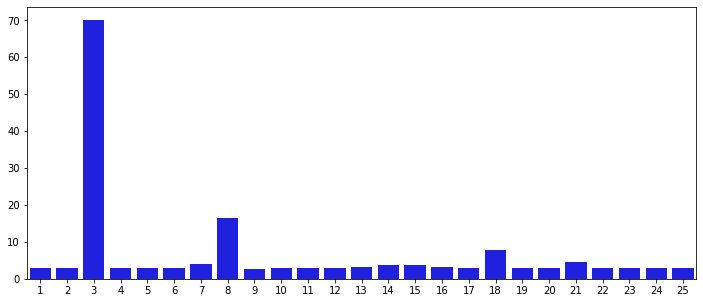

In [ ]:
import seaborn as sns
X= np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25])
plt.subplots(figsize=(12,5)) # set the size that you'd like (width, height)
clrs = ['blue' ]
sns.barplot(X, relevance,label=X,x="Feature number", y="MRMR score",palette=clrs)

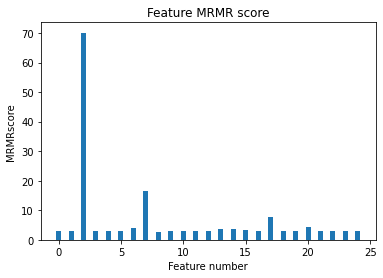

In [ ]:
plt.figure(1)
plt.clf()
plt.bar(X-1 , relevance, width=0.4)
plt.title("Feature MRMR score")
plt.xlabel("Feature number")
plt.ylabel(r"MRMRscore ")
plt.show()

In [ ]:
from tabulate import tabulate
df=pd.DataFrame({'Feature Number': X, 'MRMR Score(relevance)': relevance})
print(tabulate(df,headers="keys", tablefmt='fancy_grid'))

╒════╤══════════════════╤═════════════════════════╕
│    │   Feature Number │   MRMR Score(relevance) │
╞════╪══════════════════╪═════════════════════════╡
│  0 │                1 │                 2.90789 │
├────┼──────────────────┼─────────────────────────┤
│  1 │                2 │                 2.90789 │
├────┼──────────────────┼─────────────────────────┤
│  2 │                3 │                70.1043  │
├────┼──────────────────┼─────────────────────────┤
│  3 │                4 │                 2.90789 │
├────┼──────────────────┼─────────────────────────┤
│  4 │                5 │                 2.90789 │
├────┼──────────────────┼─────────────────────────┤
│  5 │                6 │                 2.90789 │
├────┼──────────────────┼─────────────────────────┤
│  6 │                7 │                 4.07491 │
├────┼──────────────────┼─────────────────────────┤
│  7 │                8 │                16.4568  │
├────┼──────────────────┼─────────────────────────┤
│  8 │      

In [ ]:
df.to_excel('MRMR_Scores.xlsx')